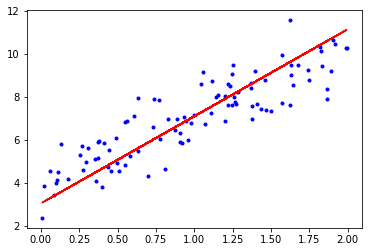

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Nomal Eqation Example

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

# theta = inv(Xt[dot]X)[dot]Xt[dot]y
X_b = np.c_[np.ones((100,1)), X]
theata_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
y_b = theata_best[0]*X+theata_best[1]

%matplotlib inline
plt.figure()
plt.plot(X,y,'b.')
plt.plot(X,y_b,'r-')
plt.show()

In [9]:
# Batch Gradiem Descent
eta = 0.01 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(theta)

[[3.94933177]
 [3.14095577]]


In [10]:
# Stochastic Gradient Descent
n_epochs = 100
t0, t1 = 5, 50 # learning scheduel hyperparameters

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
print('Stochastic gradient descent',theta)

Stochastic gradient descent [[4.03628743]
 [3.05628106]]


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


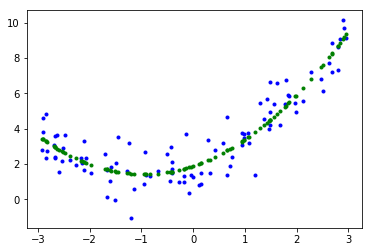

In [11]:
# Polynomial Regression
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
y_predict = lin_reg.predict(X_poly)

plt.figure()
plt.plot(X,y,'b.')
plt.plot(X,y_predict, 'g.')
plt.show()

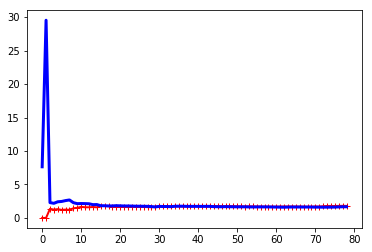

In [12]:
# Learning Curves
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors),'r-+', linewidth=2,label='train')
    plt.plot(np.sqrt(val_errors),'b-', linewidth=3, label='val')

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [13]:
# # Early Stopping

# from sklearn.base import clone
# sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
#                            learning_rate="constant", eta0=0.0005)
# minimum_val_error = float("inf")
# best_epoch = None
# best_model = None
# for epoch in range(1000):
#     sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
#     y_val_predict = sgd_reg.predict(X_val_poly_scaled)
#     val_error = mean_squared_error(y_val_predict, y_val)
#     if val_error < minimum_val_error:
#         minimum_val_error = val_error
#         best_epoch = epoch
#         best_model = clone(sgd_reg)


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


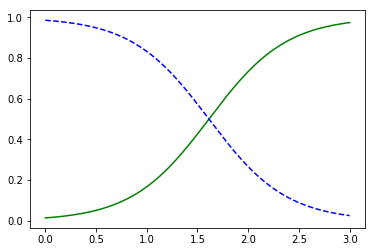

In [14]:
# Decision Boundaries

from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")